The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


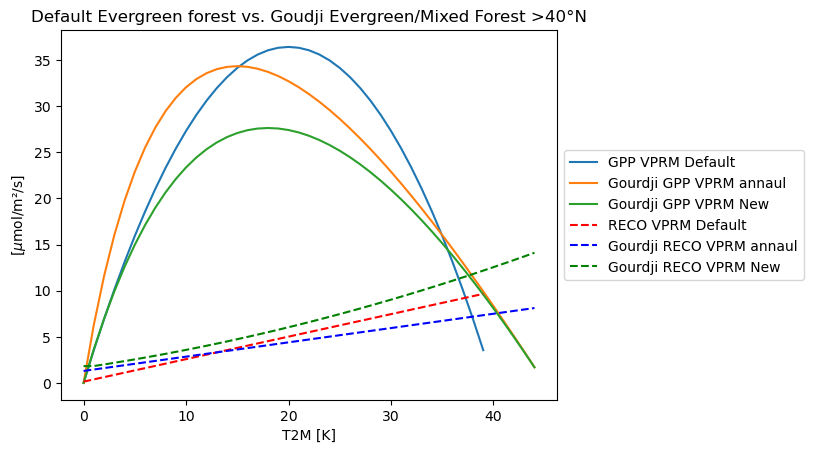

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Constants for the standard model (VPRM Default from Mahadevan 2008)
# Constants for Evergreen Forest
Tmin_standard = 0
Tmax_standard = 40
Topt_standard = 20.0
PAR0_standard = 262.0
alpha_standard = 0.244
beta_standard = 0.14
lambd_standard = 0.234

# Common parameters
LSWI_x_percent = 0.5
LSWI_max = 1.0
EVI_CONST = 1.0
PAR_CONST = 1000.0
Pscale = 1.0

# Create lists
T2M_standard = range(Tmin_standard, Tmax_standard, 1)

# Create a DataFrame for the standard model
df_standard = pd.DataFrame(index=T2M_standard)
Wscale_standard = (1 + LSWI_x_percent) / (1 + LSWI_max)
Tscale_standard = [(((t - Tmin_standard) * (t - Tmax_standard)) / ((t - Tmin_standard) * (t - Tmax_standard) - (t - Topt_standard) ** 2)) for t in T2M_standard]
GPP_standard = [(lambd_standard * ts * Pscale * Wscale_standard * EVI_CONST * PAR_CONST) / (1 + (PAR_CONST / PAR0_standard)) for ts in Tscale_standard]
R_standard = [alpha_standard * t + beta_standard for t in T2M_standard]

df_standard['GPP'] = GPP_standard
df_standard['R'] = R_standard

# Gourdji VPRM Old with annual parameters
# Constants for Evergreen/Mixed Forest >40°N
Tmin_old = 0
Tmax_old = 45
Topt_old = 15.0
PAR0_old = 624
alpha_old = 0.155
beta_old = 1.3
lambd_old = 0.0894
LSWI_x_old = 100

# Create lists
T2M_old = range(Tmin_old, Tmax_old, 1)

# Create a DataFrame for the old model
df_old = pd.DataFrame(index=T2M_old)
Wscale_old = (1 + LSWI_x_old / 100.0) / (1 + LSWI_max)
Tscale_old = [(((t - Tmin_old) * (t - Tmax_old)) / ((t - Tmin_old) * (t - Tmax_old) - (t - Topt_old) ** 2)) for t in T2M_old]
GPP_old = [(lambd_old * ts * Pscale * Wscale_old * EVI_CONST * PAR_CONST) / (1 + (PAR_CONST / PAR0_old)) for ts in Tscale_old]
R_old = [alpha_old * t + beta_old for t in T2M_old]

df_old['GPP'] = GPP_old
df_old['R'] = R_old

# Constants for the new model of Gourdji 2022 with improved respiration
# Constants for Evergreen/Mixed Forest >40°N
Tmin_new = 0
Tmax_new = 45
Topt_new = 18.0
Tcrit_new = 1
Tmult_new = 0.05
lambd_new = 0.1097
PAR0_new = 506
beta_new = 0.47
alpha_new = 0.088
alpha2_new = 0.0047
gamma_new = 1.39
theta1_new = -0.530
theta2_new = 0.2063
theta3_new = -0.0054
LSWI_x_percent_new = 0.5
LSWI_min_new = 0.2
LSWI_values_new = range(10, 101, 20)

# Create lists
T2M_new = range(Tmin_new, Tmax_new, 1)

# Create a DataFrame for the new model
df_new = pd.DataFrame(index=T2M_new)
Wscale1_new = (1 + LSWI_x_percent_new) / (1 + LSWI_max)
Wscale2_new = (LSWI_x_percent_new - LSWI_min_new) / (LSWI_max - LSWI_min_new)
Tscale_new = [(((t - Tmin_new) * (t - Tmax_new)) / ((t - Tmin_new) * (t - Tmax_new) - (t - Topt_new) ** 2)) for t in T2M_new]
GPP_new = [(lambd_new * ts * Pscale * Wscale1_new * EVI_CONST * PAR_CONST) / (1 + (PAR_CONST / PAR0_new)) for ts in Tscale_new]

ER_new_list = []
for t in T2M_new:
    if t < Tcrit_new:
        T2M_d = Tcrit_new - Tmult_new * (Tcrit_new - t)
    else:
        T2M_d = t

    ER_new = beta_new + alpha_new * T2M_d + alpha2_new * T2M_d ** 2 + gamma_new * EVI_CONST + theta1_new * Wscale2_new + theta2_new * Wscale2_new * T2M_d + theta3_new * Wscale2_new * T2M_d ** 2
    ER_new_list.append(ER_new)

df_new['GPP'] = GPP_new
df_new['R'] = ER_new_list

# Plotting
fig, ax1 = plt.subplots()

# Plot GPP lines
ax1.plot(df_standard.index, df_standard['GPP'], label='GPP VPRM Default')
ax1.plot(df_old.index, df_old['GPP'], label='Gourdji GPP VPRM annaul')
ax1.plot(df_new.index, df_new['GPP'], label='Gourdji GPP VPRM New')

# Create a second y-axis to plot R
ax1.plot(df_standard.index, df_standard['R'], 'r--', label='RECO VPRM Default')
ax1.plot(df_old.index, df_old['R'], 'b--', label='Gourdji RECO VPRM annaul')
ax1.plot(df_new.index, df_new['R'], 'g--', label='Gourdji RECO VPRM New')
ax1.set_ylabel('[$\mu$mol/m²/s]')
ax1.set_xlabel('T2M [K]')
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#fig.tight_layout()
# plt.show()
ax1.set_title("Default Evergreen forest vs. Goudji Evergreen/Mixed Forest >40°N")
figname = "./VPRM_default_vs_Goudji_annual_and_old.eps" 
plt.savefig(figname, format="eps", bbox_inches='tight')


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


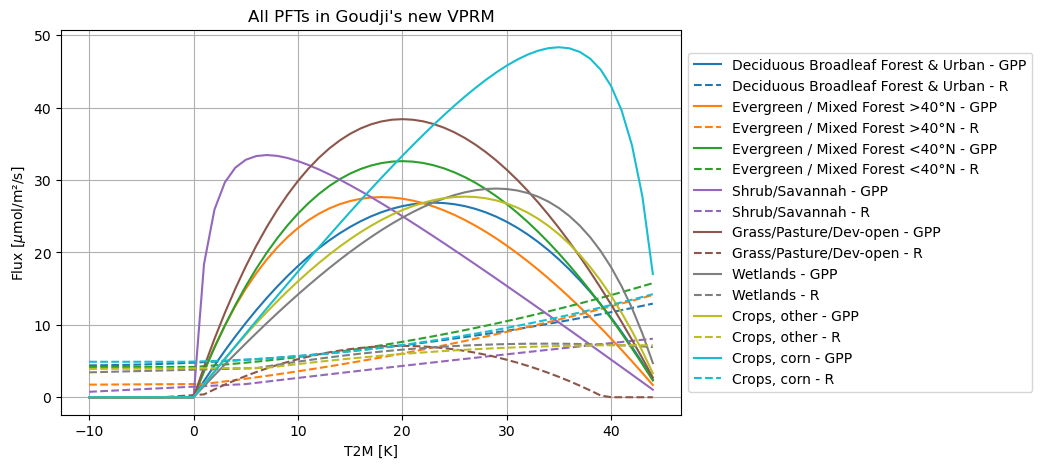

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Parameters for 8 vegetation types
parameters = {
    "Deciduous Broadleaf Forest & Urban": {"Tmin": 0, "Tmax": 45, "Topt": 23, "Tcrit": -15, "Tmult": 0.55, "lambd": -0.1023, "PAR0": 539, "beta": 0.12, "alpha": 0.065, "alpha2": 0.0024, "gamma": 4.61, "theta1": 0.116, "theta2": -0.0005, "theta3": 0.0009},
    "Evergreen / Mixed Forest >40°N": {"Tmin": 0, "Tmax": 45, "Topt": 18, "Tcrit": 1, "Tmult": 0.05, "lambd": -0.1097, "PAR0": 506, "beta": 0.47, "alpha": 0.088, "alpha2": 0.0047, "gamma": 1.39, "theta1": -0.530, "theta2": 0.2063, "theta3": -0.0054},
    "Evergreen / Mixed Forest <40°N": {"Tmin": 0, "Tmax": 45, "Topt": 20, "Tcrit": 0, "Tmult": 0, "lambd": -0.0920, "PAR0": 896, "beta": 0.28, "alpha": 0.025, "alpha2": 0.0058, "gamma": 4.18, "theta1": -0.729, "theta2": 0.1961, "theta3": -0.0055},
    "Shrub/Savannah": {"Tmin": 0, "Tmax": 45, "Topt": 7, "Tcrit": 5, "Tmult": 0.41, "lambd": -0.0996, "PAR0": 811, "beta": 1.53, "alpha": 0.004, "alpha2": 0.0049, "gamma": 0.09, "theta1": -1.787, "theta2": 0.4537, "theta3": -0.0138},
    "Grass/Pasture/Dev-open": {"Tmin": 0, "Tmax": 45, "Topt": 20, "Tcrit": 1, "Tmult": 0.14, "lambd": -0.1273, "PAR0": 673, "beta": -6.18, "alpha": 0.853, "alpha2": -0.025, "gamma": 5.19, "theta1": 1.749, "theta2": -0.2829, "theta3": 0.0166},
    "Wetlands": {"Tmin": 0, "Tmax": 45, "Topt": 29, "Tcrit": 6, "Tmult": 0.14, "lambd": -0.1227, "PAR0": 456, "beta": -0.82, "alpha": 0.261, "alpha2": -0.0051, "gamma": 3.46, "theta1": -0.7, "theta2": 0.0990, "theta3": 0.0018},
    "Crops, other": {"Tmin": 0, "Tmax": 45, "Topt": 26, "Tcrit": 7, "Tmult": 0.05, "lambd": -0.0732, "PAR0": 1019, "beta": -1.20, "alpha": 0.234, "alpha2": -0.0060, "gamma": 3.85, "theta1": 0.032, "theta2": -0.0429, "theta3": 0.0090},
    "Crops, corn": {"Tmin": 0, "Tmax": 45, "Topt": 35, "Tcrit": -1, "Tmult": 0, "lambd": -0.0997, "PAR0": 1829, "beta": -0.02, "alpha": 0.083, "alpha2": -0.0018, "gamma": 4.89, "theta1": 0.150, "theta2": -0.1324, "theta3": 0.0156},
}

# Common parameters
LSWI_x_percent = 0.5
LSWI_min = 0.2
LSWI_max = 1.0
T2M = range(-10, 45, 1)
EVI_CONST = 1.0
PAR_CONST = 1000.0
Pscale = 1.0

# Plotting
fig, ax1 = plt.subplots(figsize=(8, 5)) 
ax1.grid(True)
# Plot GPP and R for each vegetation type
color_cycle = plt.cm.get_cmap('tab10', len(parameters))

for i, (veg_type, veg_params) in enumerate(parameters.items()):
    Tmin = veg_params["Tmin"]
    Tmax = veg_params["Tmax"]
    Topt = veg_params["Topt"]
    Tcrit = veg_params["Tcrit"]
    Tmult = veg_params["Tmult"]
    lambd = veg_params["lambd"]
    PAR0 = veg_params["PAR0"]
    beta = veg_params["beta"]
    alpha = veg_params["alpha"]
    alpha2 = veg_params["alpha2"]
    gamma = veg_params["gamma"]
    theta1 = veg_params["theta1"]
    theta2 = veg_params["theta2"]
    theta3 = veg_params["theta3"]

    Wscale1 = (1 + LSWI_x_percent) / (1 + LSWI_max)
    Wscale2 = (LSWI_x_percent - LSWI_min) / (LSWI_max - LSWI_min)

    Tscale = [(((t - Tmin) * (t - Tmax)) / ((t - Tmin) * (t - Tmax) - (t - Topt) ** 2)) for t in T2M]
    GPP = [(-lambd * ts * Pscale * Wscale1 * EVI_CONST * PAR_CONST) / (1 + (PAR_CONST / PAR0)) for ts in Tscale]
    for j in range(len(T2M)):
        if T2M[j] <= 0:
            GPP[j] = 0

    ER_list = []
    for t in T2M:
        if t < Tcrit:
            T2M_d = Tcrit - Tmult * (Tcrit - t)
        else:
            T2M_d = t

        ER = beta + alpha * T2M_d + alpha2 * T2M_d ** 2 + gamma * EVI_CONST + theta1 * Wscale2 + theta2 * Wscale2 * T2M_d + theta3 * Wscale2 * T2M_d ** 2
        if ER < 0:
            ER = 0
        ER_list.append(ER)

    color = color_cycle(i)
    ax1.plot(T2M, GPP, color=color, linestyle='-', label=f'{veg_type} - GPP')
    ax1.plot(T2M, ER_list, color=color, linestyle='--', label=f'{veg_type} - R')

ax1.set_xlabel('T2M [K]')
ax1.set_ylabel('Flux [$\mu$mol/m²/s]')
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#fig.tight_layout()
ax1.set_title("All PFTs in Goudji's new VPRM")
figname = "./VPRM_Goudji_new_all_PFT.eps" 
plt.savefig(figname, format="eps", bbox_inches='tight')


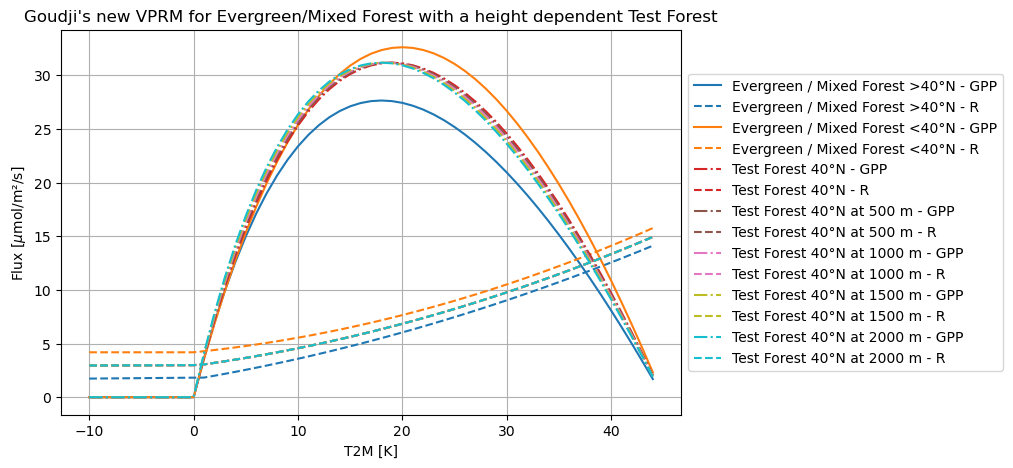

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Parameters for Evergreen Forest vegetation types
evergreen_params = {
    "Evergreen / Mixed Forest >40°N": {"Tmin": 0, "Tmax": 45, "Topt": 18, "Tcrit": 1, "Tmult": 0.05, "lambd": -0.1097, "PAR0": 506, "beta": 0.47, "alpha": 0.088, "alpha2": 0.0047, "gamma": 1.39, "theta1": -0.530, "theta2": 0.2063, "theta3": -0.0054},
    "Evergreen / Mixed Forest <40°N": {"Tmin": 0, "Tmax": 45, "Topt": 20, "Tcrit": 0, "Tmult": 0, "lambd": -0.0920, "PAR0": 896, "beta": 0.28, "alpha": 0.025, "alpha2": 0.0058, "gamma": 4.18, "theta1": -0.729, "theta2": 0.1961, "theta3": -0.0055},
    }

# Calculate average values for "Test Forest 40°N"
evergreen_40N_params = {}
for param_name in evergreen_params["Evergreen / Mixed Forest >40°N"]:
        evergreen_40N_params[param_name] = (evergreen_params["Evergreen / Mixed Forest >40°N"][param_name] + evergreen_params["Evergreen / Mixed Forest <40°N"][param_name]) / 2
# Add the new entry
evergreen_params["Test Forest 40°N"] = evergreen_40N_params

for height_i in range(500, 2001, 500):
    evergreen_params[f"Test Forest 40°N at {height_i} m"] = evergreen_params["Test Forest 40°N"].copy()
    evergreen_params[f"Test Forest 40°N at {height_i} m"]["Topt"] -= height_i * 0.5 / 1000
    evergreen_params[f"Test Forest 40°N at {height_i} m"]["PAR0"] -= height_i * 50 / 1000

# Common parameters
LSWI_x_percent = 0.5
LSWI_min = 0.2
LSWI_max = 1.0
T2M = range(-10, 45, 1)
EVI_CONST = 1.0
PAR_CONST = 1000.0
Pscale = 1.0

# Plotting
fig, ax1 = plt.subplots(figsize=(8, 5)) 
ax1.grid(True)

# Plot GPP and R for each Evergreen Forest vegetation type
color_cycle = plt.cm.get_cmap('tab10', len(evergreen_params))

for i, (veg_type, veg_params) in enumerate(evergreen_params.items()):
    Tmin = veg_params["Tmin"]
    Tmax = veg_params["Tmax"]
    Topt = veg_params["Topt"]
    Tcrit = veg_params["Tcrit"]
    Tmult = veg_params["Tmult"]
    lambd = veg_params["lambd"]
    PAR0 = veg_params["PAR0"]
    beta = veg_params["beta"]
    alpha = veg_params["alpha"]
    alpha2 = veg_params["alpha2"]
    gamma = veg_params["gamma"]
    theta1 = veg_params["theta1"]
    theta2 = veg_params["theta2"]
    theta3 = veg_params["theta3"]

    Wscale1 = (1 + LSWI_x_percent) / (1 + LSWI_max)
    Wscale2 = (LSWI_x_percent - LSWI_min) / (LSWI_max - LSWI_min)

    Tscale = [(((t - Tmin) * (t - Tmax)) / ((t - Tmin) * (t - Tmax) - (t - Topt) ** 2)) for t in T2M]
    GPP = [(-lambd * ts * Pscale * Wscale1 * EVI_CONST * PAR_CONST) / (1 + (PAR_CONST / PAR0)) for ts in Tscale]
    for j in range(len(T2M)):
        if T2M[j] <= 0:
            GPP[j] = 0

    ER_list = []
    for t in T2M:
        if t < Tcrit:
            T2M_d = Tcrit - Tmult * (Tcrit - t)
        else:
            T2M_d = t

        ER = beta + alpha * T2M_d + alpha2 * T2M_d ** 2 + gamma * EVI_CONST + theta1 * Wscale2 + theta2 * Wscale2 * T2M_d + theta3 * Wscale2 * T2M_d ** 2
        if ER < 0:
            ER = 0
        ER_list.append(ER)

    color = color_cycle(i)
    if i < 2: 
        ax1.plot(T2M, GPP, color=color, linestyle='-', label=f'{veg_type} - GPP')
    else: 
        ax1.plot(T2M, GPP, color=color, linestyle='-.', label=f'{veg_type} - GPP')
    ax1.plot(T2M, ER_list, color=color, linestyle='--', label=f'{veg_type} - R')

ax1.set_xlabel('T2M [K]')
ax1.set_ylabel('Flux [$\mu$mol/m²/s]')
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#fig.tight_layout()
ax1.set_title("Goudji's new VPRM for Evergreen/Mixed Forest with a height dependent Test Forest")
figname = "./VPRM_height_dependent_Test_Forest.eps" 
# plt.savefig(figname, format="eps", bbox_inches='tight')
plt.show()